In [146]:
import warnings
warnings.filterwarnings('ignore')

In [147]:
import sqlite3
import lifelines
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("../data/sample_20210509.sqlite")

What is the survival curve of people who reach level 30?

In [148]:
df = pd.read_sql_query("""
    with recent as (
        select 
            name,
            max(level) as level,
            min(timestamp) as start_ts,
            max(timestamp) as end_ts
        from levels
        where level <= 70
        group by 1
    )
    select
        name,
        iif(level < 70, julianday("2021-05-09"), julianday(end_ts))-julianday(start_ts) as duration,
        level = 70 as observed
    from recent
""", conn)
df

,name,duration,observed
0,0100,789.443472,0
1,0men,23.027905,1
2,12PM,51.246887,0
3,1stTimeMaple,1768.058241,0
4,20XX,13.892130,1
...,...,...,...
979,yhwach,1074.440903,0
980,zImBaby,1959.207627,0
981,zenq,406.435961,0
982,zzaapp,31.685313,0


Text(0.5, 0, 'timescale (days)')

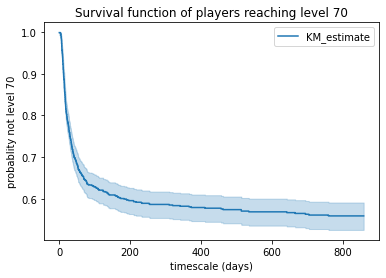

In [149]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(df.duration, event_observed=df.observed)

kmf.plot_survival_function(iloc=slice(0,365*2))
plt.title('Survival function of players reaching level 70');
plt.ylabel("probablity not level 70")
plt.xlabel("timescale (days)")

In [150]:
kmf.percentile(0.75)

30.314490740653127

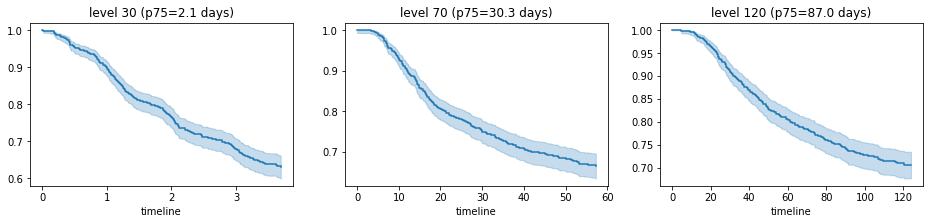

In [151]:
def prepare_duration_observed(conn, level):
    return pd.read_sql_query(f"""
        with recent as (
            select 
                name,
                max(level) as level,
                min(timestamp) as start_ts,
                max(timestamp) as end_ts
            from levels
            where level <= {level}
            group by 1
        )
        select
            name,
            iif(level < {level}, julianday("2021-05-09"), julianday(end_ts))-julianday(start_ts) as duration,
            level = {level} as observed
        from recent
    """, conn)

plt.figure(figsize=(16, 3))
kmf = KaplanMeierFitter()
for i, level in enumerate([30, 70, 120]):
    df = prepare_duration_observed(conn, level)
    kmf.fit(df.duration, event_observed=df.observed)
    
    ax = plt.subplot(1, 3, i + 1)
    kmf.plot_survival_function(iloc=slice(0,365), ax=ax, legend=False)
    plt.title(f"level {level} (p75={kmf.percentile(0.75):.1f} days)")
    

<AxesSubplot:xlabel='timeline'>

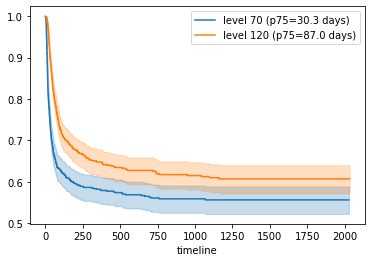

In [152]:
# plt.figure(figsize=(12, 8))
ax = plt.subplot(1, 3, i + 1)
kmf = KaplanMeierFitter()

ax = plt.subplot(111)
df = prepare_duration_observed(conn, 70)
kmf.fit(df.duration, event_observed=df.observed)
kmf.plot_survival_function(ax=ax, label=f"level 70 (p75={kmf.percentile(0.75):.1f} days)")

df = prepare_duration_observed(conn, 120)
kmf.fit(df.duration, event_observed=df.observed)
kmf.plot_survival_function(ax=ax, label=f"level 120 (p75={kmf.percentile(0.75):.1f} days)")

Text(0.5, 0, 'timescale (days)')

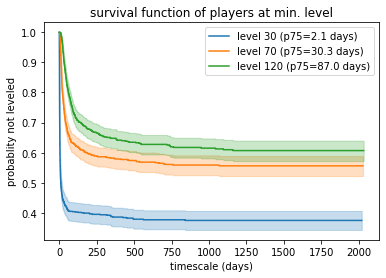

In [153]:
ax = plt.subplot(1, 3, i + 1)
kmf = KaplanMeierFitter()

ax = plt.subplot(111)

for level in [30, 70, 120]:
    df = prepare_duration_observed(conn, level)
    kmf.fit(df.duration, event_observed=df.observed)
    kmf.plot_survival_function(ax=ax, label=f"level {level} (p75={kmf.percentile(0.75):.1f} days)")

plt.title("survival function of players at min. level")
plt.ylabel("probablity not leveled")
plt.xlabel("timescale (days)")

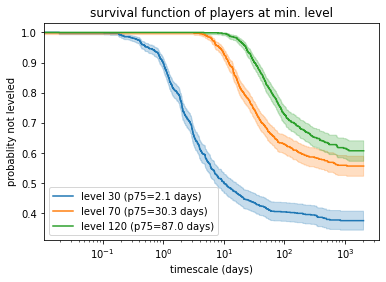

In [154]:
ax = plt.subplot(1, 3, i + 1)
kmf = KaplanMeierFitter()

ax = plt.subplot(111)

for level in [30, 70, 120]:
    df = prepare_duration_observed(conn, level)
    kmf.fit(df.duration, event_observed=df.observed)
    kmf.plot_survival_function(ax=ax, label=f"level {level} (p75={kmf.percentile(0.75):.1f} days)")

plt.title("survival function of players at min. level")
plt.ylabel("probablity not leveled")
plt.xlabel("timescale (days)")
plt.xscale("log")